In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
dataset = pd.read_csv('bbc-news-data.csv', sep="\t")

Импортируем датасет

In [2]:
dataset.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


Смотрим структуру датасета

In [3]:
dataset['title'] = dataset['title'].str.lower()
dataset['content'] = dataset['content'].str.lower()

Переводим все в мелкий шрифт

In [4]:
dataset['category'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

Уникальные значения в "category" - business', 'entertainment', 'politics',
'sport', 'tech'

In [5]:
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['category'] = le.fit_transform(dataset['category'])

Кодируем нашу колонку "category" с помощью labelEncoder

In [6]:
dataset = dataset.drop('filename',axis=1)

In [7]:
dataset.head()

,category,title,content
0,0,ad sales boost time warner profit,quarterly profits at us media giant timewarne...
1,0,dollar gains on greenspan speech,the dollar has hit its highest level against ...
2,0,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...
3,0,high fuel prices hit ba's profits,british airways has blamed high fuel prices f...
4,0,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...


In [8]:
import re

dataset['title'] = dataset['title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x)) 

dataset['title'] = dataset['title'].apply(lambda x: ' '.join(word for word in x.split() if len(word) > 1))


dataset['content'] = dataset['content'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x)) 

dataset['content'] = dataset['content'].apply(lambda x: ' '.join(word for word in x.split() if len(word) > 1))


Удаления лишнх символов

In [9]:
dataset.head()

,category,title,content
0,0,ad sales boost time warner profit,quarterly profits at us media giant timewarner...
1,0,dollar gains on greenspan speech,the dollar has hit its highest level against t...
2,0,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuko...
3,0,high fuel prices hit bas profits,british airways has blamed high fuel prices fo...
4,0,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied domec...


In [10]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
dataset['content'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
dataset['title'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

0       ad sale boost time warner profit
1        dollar gain on greenspan speech
2        yuko unit buyer face loan claim
3          high fuel price hit ba profit
4         pernod takeov talk lift domecq
                      ...               
2220     bt program to beat dialler scam
2221        spam email tempt net shopper
2222                be care how you code
2223         us cyber secur chief resign
2224         lose yourself in onlin game
Name: title, Length: 2225, dtype: object

Перевод слов в начальную форму

In [11]:
dataset.head()

,category,title,content
0,0,ad sales boost time warner profit,quarterly profits at us media giant timewarner...
1,0,dollar gains on greenspan speech,the dollar has hit its highest level against t...
2,0,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuko...
3,0,high fuel prices hit bas profits,british airways has blamed high fuel prices fo...
4,0,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied domec...


In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
dataset['title'] = dataset['title'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))
dataset['content'] = dataset['content'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Удаляем стоп-слова

In [14]:
dataset

,category,title,content
0,0,ad sales boost time warner profit,quarterly profits us media giant timewarner ju...
1,0,dollar gains greenspan speech,dollar hit highest level euro almost three mon...
2,0,yukos unit buyer faces loan claim,owners embattled russian oil giant yukos ask b...
3,0,high fuel prices hit bas profits,british airways blamed high fuel prices 40 dro...
4,0,pernod takeover talk lifts domecq,shares uk drinks food firm allied domecq risen...
...,...,...,...
2220,4,bt program beat dialler scams,bt introducing two initiatives help beat rogue...
2221,4,spam emails tempt net shoppers,computer users across world continue ignore se...
2222,4,careful code,new european directive could put software writ...
2223,4,us cyber security chief resigns,man making sure us computer networks safe secu...


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(dataset['content'].astype('U'))
y = dataset['category'].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [18]:
x_pred = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, x_pred)

0.9707865168539326

0.97 Показала нам линейная регрессия

In [19]:
x_pred

array([0, 0, 3, 0, 2, 3, 3, 2, 1, 2, 0, 1, 3, 0, 1, 0, 4, 1, 0, 1, 0, 3,
       0, 1, 0, 3, 1, 3, 2, 3, 3, 2, 4, 1, 0, 0, 0, 3, 4, 3, 4, 2, 0, 3,
       4, 4, 4, 0, 0, 4, 1, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 3, 1,
       0, 0, 2, 3, 2, 2, 4, 3, 1, 3, 3, 1, 0, 0, 3, 3, 0, 1, 1, 3, 3, 3,
       1, 3, 3, 0, 2, 0, 3, 0, 1, 1, 0, 2, 0, 2, 0, 0, 3, 2, 3, 4, 1, 2,
       0, 4, 1, 0, 2, 3, 1, 1, 1, 3, 3, 2, 0, 2, 4, 0, 4, 1, 0, 1, 3, 1,
       1, 3, 3, 2, 0, 0, 1, 4, 4, 0, 2, 0, 4, 1, 4, 0, 0, 2, 3, 1, 0, 4,
       4, 3, 3, 1, 3, 1, 4, 1, 0, 2, 4, 1, 0, 4, 4, 1, 2, 3, 4, 1, 3, 4,
       2, 2, 0, 3, 2, 3, 0, 2, 4, 3, 1, 3, 4, 0, 0, 3, 1, 4, 4, 1, 2, 2,
       3, 4, 3, 1, 0, 4, 0, 2, 3, 2, 3, 3, 3, 4, 4, 1, 3, 2, 4, 4, 0, 4,
       0, 2, 0, 1, 2, 2, 2, 2, 0, 1, 3, 3, 1, 0, 4, 3, 1, 0, 4, 0, 3, 0,
       2, 3, 0, 0, 0, 0, 3, 0, 2, 3, 4, 0, 1, 3, 1, 3, 3, 3, 2, 4, 0, 1,
       3, 0, 2, 3, 0, 0, 0, 0, 0, 1, 0, 3, 1, 2, 4, 0, 0, 4, 0, 0, 0, 4,
       2, 3, 0, 4, 0, 1, 0, 1, 2, 0, 0, 4, 0, 4, 3,

In [20]:
y_test

array([0, 0, 3, 0, 2, 3, 3, 2, 1, 2, 0, 1, 3, 0, 1, 0, 4, 1, 0, 1, 0, 3,
       0, 1, 0, 3, 1, 3, 2, 3, 3, 2, 4, 1, 0, 0, 0, 3, 4, 3, 4, 2, 0, 3,
       4, 4, 4, 0, 0, 4, 1, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0, 1, 1, 0, 3, 1,
       0, 0, 2, 3, 2, 2, 4, 3, 0, 3, 3, 1, 0, 0, 3, 3, 0, 1, 1, 3, 3, 3,
       1, 3, 3, 0, 2, 0, 3, 0, 1, 1, 0, 2, 0, 2, 4, 0, 3, 2, 3, 4, 1, 2,
       0, 4, 1, 0, 2, 3, 1, 1, 1, 3, 1, 2, 0, 2, 4, 4, 4, 1, 0, 1, 3, 1,
       1, 3, 3, 2, 0, 0, 1, 4, 4, 0, 2, 0, 4, 1, 4, 0, 0, 2, 3, 1, 0, 4,
       4, 3, 3, 1, 0, 1, 4, 1, 0, 2, 4, 1, 0, 4, 4, 1, 2, 3, 4, 1, 3, 4,
       2, 2, 0, 3, 2, 3, 0, 2, 4, 3, 1, 3, 4, 0, 0, 3, 1, 4, 4, 1, 2, 2,
       3, 4, 3, 1, 0, 4, 0, 2, 3, 2, 3, 3, 3, 2, 4, 1, 3, 2, 4, 4, 0, 4,
       0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 3, 3, 1, 2, 4, 3, 1, 0, 4, 0, 3, 0,
       2, 3, 0, 0, 0, 0, 3, 0, 2, 3, 4, 0, 1, 3, 1, 3, 3, 3, 2, 4, 0, 1,
       3, 0, 2, 3, 0, 0, 0, 0, 0, 1, 0, 3, 1, 2, 4, 0, 0, 4, 0, 0, 0, 4,
       2, 3, 0, 4, 0, 4, 0, 1, 2, 0, 0, 4, 0, 4, 3,

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9573033707865168

In [ ]:
import pickle
filename = 'gbc_model.sav'
pickle.dump(gbc, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(y_test, y_pred)
print(result)

Сохраняем нашу модель

0.957 Показала нам градиентный бустинг


In [ ]:
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 5],
    'max_features': ['sqrt', 'log2']
}


grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Выведем наилучшие гиперпараметры и точность модели на тестовом наборе данных
print("Best parameters: ", grid_search.best_params_)
print("Accuracy score: ", accuracy_score(y, grid_search.predict(X)))

Воспользуемся Grid_Search

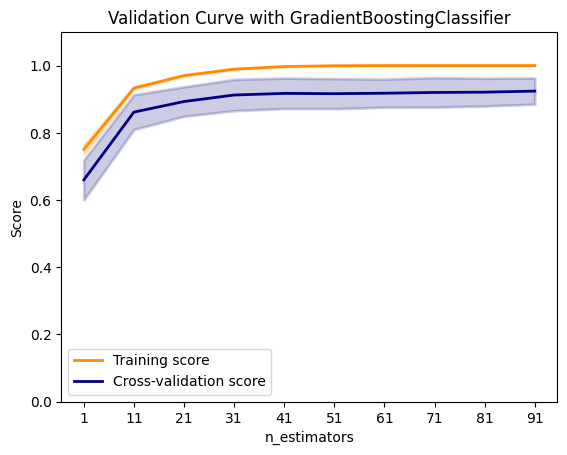

In [25]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import GradientBoostingClassifier

# Создаем модель
model = GradientBoostingClassifier()

# Создаем сетку параметров
param_range = np.arange(1, 100, 10)
train_scores, test_scores = validation_curve(
    model, X, y, param_name="n_estimators", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1)

# Вычисляем среднее значение и стандартное отклонение для оценок на обучающем и тестовом наборах
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Строим график
plt.title("Validation Curve with GradientBoostingClassifier")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.xticks(param_range)
lw = 2
plt.plot(param_range, train_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


График кривой валидации ✅ При n_estimators 11, наша точность повышается, при 41 достигает свой пик


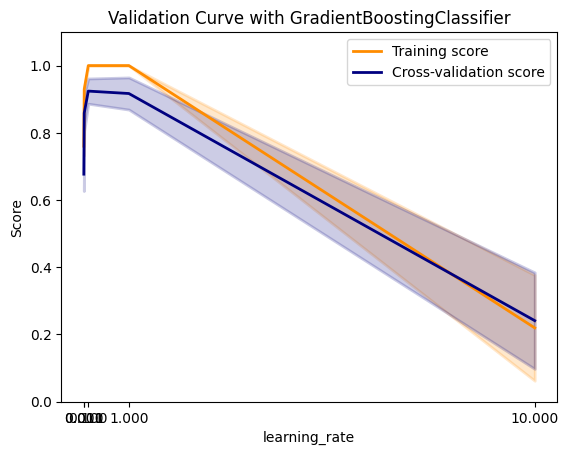

In [39]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import GradientBoostingClassifier

# Создаем модель
model = GradientBoostingClassifier()

# Создаем сетку параметров
param_range = [0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
    model, X, y, param_name="learning_rate", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1)

# Вычисляем среднее значение и стандартное отклонение для оценок на обучающем и тестовом наборах
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Строим график
plt.title("Validation Curve with GradientBoostingClassifier")
plt.xlabel("learning_rate")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.xticks(param_range)
lw = 2
plt.plot(param_range, train_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()
